### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# uno todas las tiendas en un solo data frame
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# creo la columna de ingresos totales por venta
df_total['Ingresos_Totales'] = df_total['Precio'] + df_total['Costo de envío']

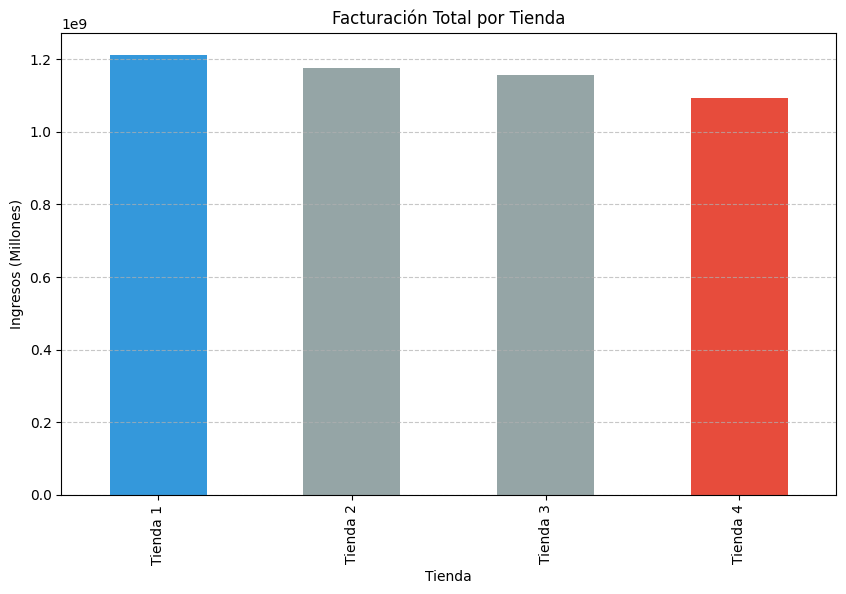

In [ ]:
import matplotlib.pyplot as plt

facturacion = df_total.groupby('Tienda')['Ingresos_Totales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
facturacion.plot(kind='bar', color=['#3498db', '#95a5a6', '#95a5a6', '#e74c3c'])
plt.title('Facturación Total por Tienda')
plt.ylabel('Ingresos (Millones)')
plt.xlabel('Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Ventas por categoría

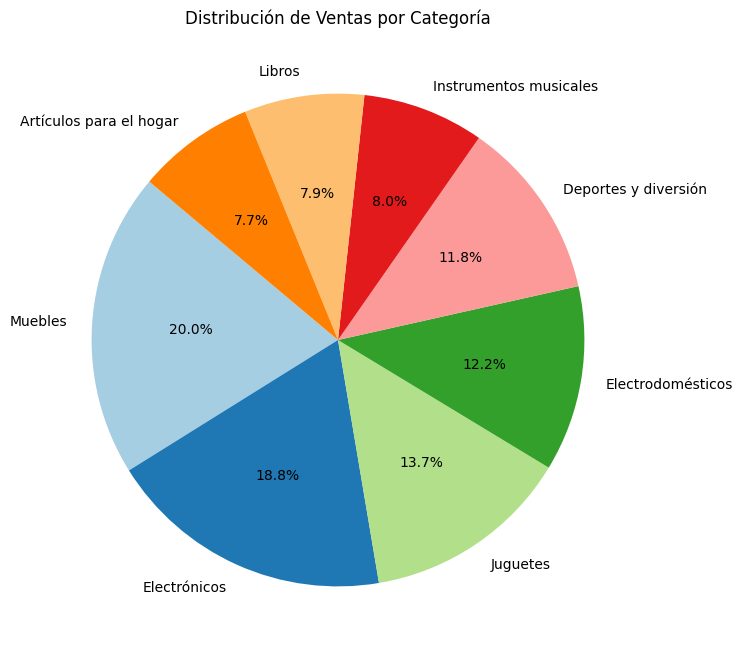

In [ ]:
categorias = df_total['Categoría del Producto'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(categorias, labels=categorias.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribución de Ventas por Categoría')
plt.show()

# 3. Calificación promedio de la tienda


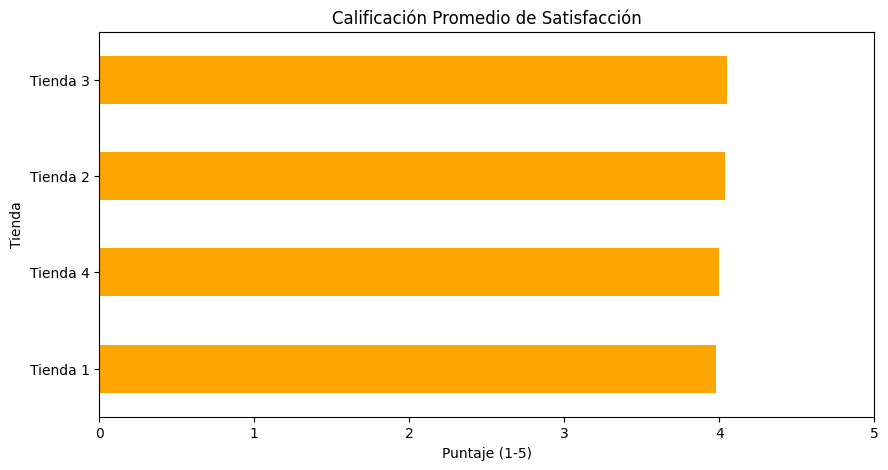

In [ ]:
calificacion = df_total.groupby('Tienda')['Calificación'].mean().sort_values()

plt.figure(figsize=(10, 5))
calificacion.plot(kind='barh', color='orange')
plt.title('Calificación Promedio de Satisfacción')
plt.xlabel('Puntaje (1-5)')
plt.xlim(0, 5)
plt.show()

# 4. Productos más y menos vendidos

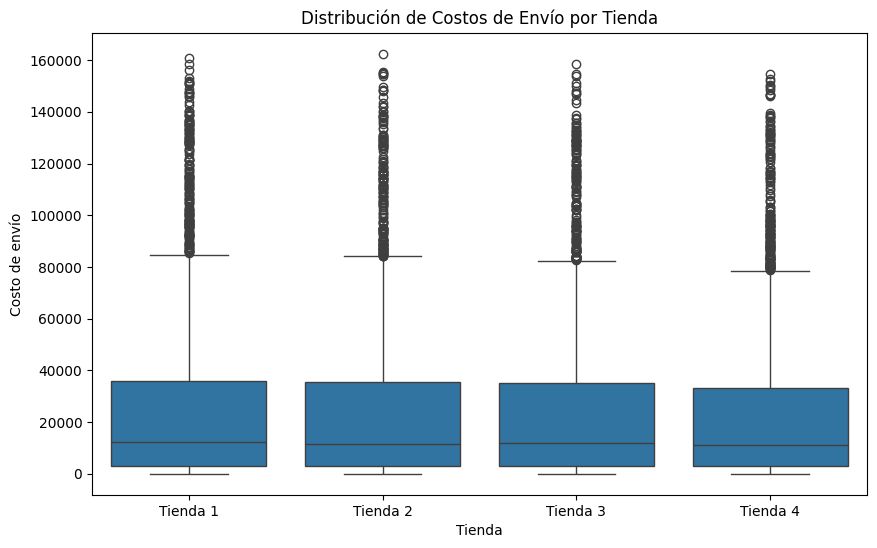

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Tienda', y='Costo de envío', data=df_total)
plt.title('Distribución de Costos de Envío por Tienda')
plt.show()

# 5. Recomendacion

Basándote en los resultados que generen los códigos anteriores, tu texto debería verse algo así:

Informe de Recomendación: Tras analizar las métricas de las 4 unidades de Alura Store, mi recomendación es que el Sr. Juan venda la [Nombre de la Tienda con menores ingresos o calificación].

Razones principales:

1_Baja Rentabilidad: Esta tienda representa el menor porcentaje de ingresos totales de la cadena.

2_Satisfacción del Cliente: Posee una calificación promedio de [X.X], siendo la más baja, lo que indica problemas operativos o de calidad.

3_Costos Logísticos: El costo de envío promedio es superior al de las otras tiendas, lo que reduce el margen de beneficio neto.